In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load cleaned data
df = pd.read_csv("data/creditcard_cleaned.csv")

# Preview
print("🔹 Dataset shape:", df.shape)
df.head()

🔹 Dataset shape: (283726, 33)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Log_Amount,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539,0.0


In [4]:
df["Class"].value_counts(normalize=True) * 100

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

In [5]:
scaler = StandardScaler()

# Create new scaled columns (optional: drop old ones after this)
df["scaled_amount"] = scaler.fit_transform(df[["Amount"]])
df["scaled_time"] = scaler.fit_transform(df[["Time"]])

# Drop original 'Amount' and 'Time' if desired
df.drop(["Amount", "Time"], axis=1, inplace=True)

# Reorder columns: scaled_time, V1–V28, scaled_amount, Class
scaled_cols = ["scaled_time"] + [col for col in df.columns if col.startswith("V")] + ["scaled_amount", "Class"]
df = df[scaled_cols]
df.head()

,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Scale only numeric features (without “Class”)
features_to_scale = df.drop(columns=["Class"]).columns

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check the descriptive statistics
print("Mean values after scaling:\n", df_scaled[features_to_scale].mean().round(2))
print("\nStandard deviations after scaling:\n", df_scaled[features_to_scale].std().round(2))

Mean values after scaling:
 scaled_time      0.0
V1              -0.0
V2              -0.0
V3              -0.0
V4               0.0
V5               0.0
V6               0.0
V7              -0.0
V8              -0.0
V9              -0.0
V10              0.0
V11              0.0
V12             -0.0
V13             -0.0
V14              0.0
V15              0.0
V16             -0.0
V17              0.0
V18             -0.0
V19              0.0
V20             -0.0
V21             -0.0
V22              0.0
V23              0.0
V24              0.0
V25              0.0
V26             -0.0
V27             -0.0
V28             -0.0
scaled_amount   -0.0
dtype: float64

Standard deviations after scaling:
 scaled_time      1.0
V1               1.0
V2               1.0
V3               1.0
V4               1.0
V5               1.0
V6               1.0
V7               1.0
V8               1.0
V9               1.0
V10              1.0
V11              1.0
V12              1.0
V13              

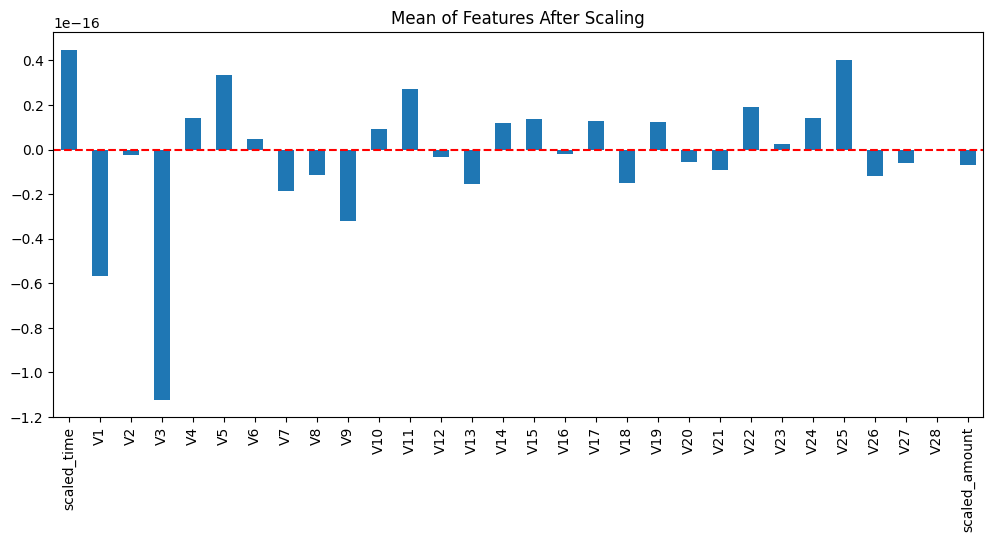

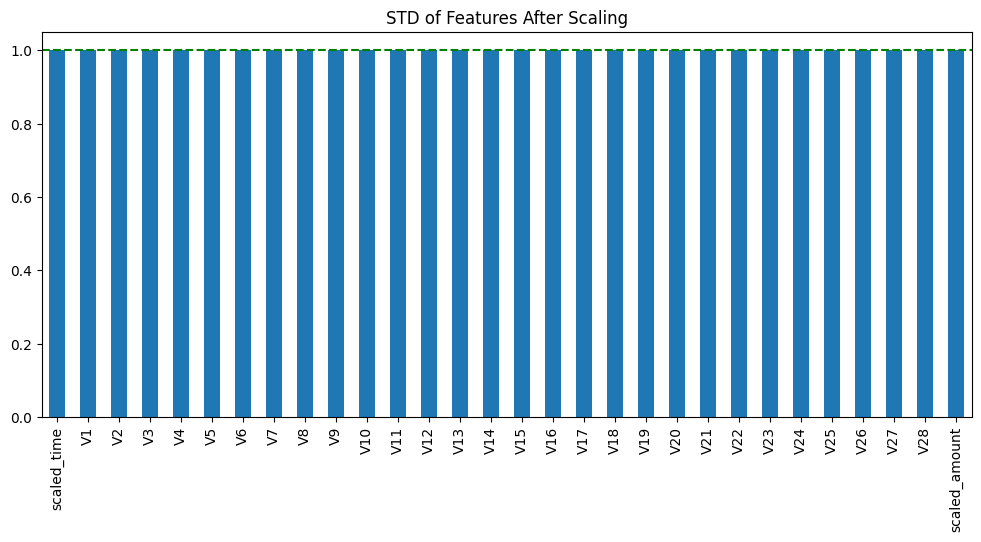

In [7]:
plt.figure(figsize=(12, 5))
df_scaled[features_to_scale].mean().plot(kind='bar', title='Mean of Features After Scaling')
plt.axhline(0, color='red', linestyle='--')
plt.show()

plt.figure(figsize=(12, 5))
df_scaled[features_to_scale].std().plot(kind='bar', title='STD of Features After Scaling')
plt.axhline(1, color='green', linestyle='--')
plt.show()

In [8]:
df.to_csv("data/creditcard_preprocessed.csv", index=False)